<a href="https://colab.research.google.com/github/financieras/big_data/blob/main/retos/reto_007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto 7. Estadísticas descriptivas y pairplot**
- Carga Iris desde Seaborn: `sns.load_dataset('iris')`
- Calcula media de todas las columnas numéricas con `.mean()`
- Calcula desviación estándar con `.std()`
- Calcula estadísticas por especie: `df.groupby('species').mean()`
- Crea pairplot coloreado por especie: `sns.pairplot(df, hue='species')`

# **Resolución del Reto 7**

## **Paso 1: Cargar dataset Iris desde Seaborn**
Comenzamos cargando el dataset desde Seaborn, una fuente confiable y rápida para datasets clásicos de machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


print("🌸 Paso 1: Cargando dataset Iris desde Seaborn...")
df = sns.load_dataset('iris')
print("✅ Dataset Iris cargado correctamente")
print(f"Dimensiones: {df.shape}")
print(f"Columnas: {list(df.columns)}")

🌸 Paso 1: Cargando dataset Iris desde Seaborn...
✅ Dataset Iris cargado correctamente
Dimensiones: (150, 5)
Columnas: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


## **Paso 2: Estadísticas descriptivas básicas**
Calculamos medidas de tendencia central y dispersión para entender la distribución general de todas las variables numéricas.

In [ ]:
print("\n📊 Paso 2: Estadísticas descriptivas básicas...")

# Media de todas las columnas numéricas
print("\n📈 MEDIA de todas las columnas numéricas:")
medias = df.select_dtypes(include=[np.number]).mean()
for columna, media in medias.items():
    print(f"   - {columna}: {media:.2f}")

# Desviación estándar de todas las columnas numéricas
print("\n📏 DESVIACIÓN ESTÁNDAR de todas las columnas numéricas:")
desviaciones = df.select_dtypes(include=[np.number]).std()
for columna, desviacion in desviaciones.items():
    print(f"   - {columna}: {desviacion:.2f}")


📊 Paso 2: Estadísticas descriptivas básicas...

📈 MEDIA de todas las columnas numéricas:
   - sepal_length: 5.84
   - sepal_width: 3.06
   - petal_length: 3.76
   - petal_width: 1.20

📏 DESVIACIÓN ESTÁNDAR de todas las columnas numéricas:
   - sepal_length: 0.83
   - sepal_width: 0.44
   - petal_length: 1.77
   - petal_width: 0.76


## **Paso 3: Estadísticas por especie**
Agrupamos los datos por especie para descubrir patrones específicos y diferencias entre categorías.

In [ ]:
print("\n🌺 Paso 3: Estadísticas por especie...")

# Estadísticas descriptivas agrupadas por especie
print("\n📋 ESTADÍSTICAS POR ESPECIE (Media):")
estadisticas_especie = df.groupby('species').mean()
print(estadisticas_especie)

# Mostrar de forma más legible
print("\n📊 RESUMEN POR ESPECIE:")
for especie in df['species'].unique():
    print(f"\n🌱 {especie.upper()}:")
    datos_especie = df[df['species'] == especie].select_dtypes(include=[np.number])
    for columna in datos_especie.columns:
        media = datos_especie[columna].mean()
        std = datos_especie[columna].std()
        print(f"   - {columna}: Media = {media:.2f}, Desv. Est. = {std:.2f}")


🌺 Paso 3: Estadísticas por especie...

📋 ESTADÍSTICAS POR ESPECIE (Media):
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

📊 RESUMEN POR ESPECIE:

🌱 SETOSA:
   - sepal_length: Media = 5.01, Desv. Est. = 0.35
   - sepal_width: Media = 3.43, Desv. Est. = 0.38
   - petal_length: Media = 1.46, Desv. Est. = 0.17
   - petal_width: Media = 0.25, Desv. Est. = 0.11

🌱 VERSICOLOR:
   - sepal_length: Media = 5.94, Desv. Est. = 0.52
   - sepal_width: Media = 2.77, Desv. Est. = 0.31
   - petal_length: Media = 4.26, Desv. Est. = 0.47
   - petal_width: Media = 1.33, Desv. Est. = 0.20

🌱 VIRGINICA:
   - sepal_length: Media = 6.59, Desv. Est. = 0.64
   - sepal_width: Media = 2.97, Desv. Est. = 0.32
   - petal_length: Media = 5.5

## **Paso 4: Análisis comparativo entre especies**
Identificamos qué características muestran mayores diferencias entre especies, revelando variables potencialmente discriminantes.

In [ ]:
print("\n🔍 Paso 4: Análisis comparativo entre especies...")

# Encontrar características con mayores diferencias entre especies
caracteristicas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

print("\n🎯 CARACTERÍSTICAS CON MAYORES DIFERENCIAS ENTRE ESPECIES:")
for caracteristica in caracteristicas:
    valores = df.groupby('species')[caracteristica].mean()
    rango = valores.max() - valores.min()
    print(f"   - {caracteristica}: Rango = {rango:.2f}")

# Identificar especie con valores más extremos
print("\n🏆 ESPECIE CON VALORES MÁS EXTREMOS:")
for caracteristica in caracteristicas:
    max_especie = df.groupby('species')[caracteristica].mean().idxmax()
    min_especie = df.groupby('species')[caracteristica].mean().idxmin()
    max_valor = df.groupby('species')[caracteristica].mean().max()
    min_valor = df.groupby('species')[caracteristica].mean().min()
    print(f"   - {caracteristica}: Máx = {max_especie} ({max_valor:.2f}), Mín = {min_especie} ({min_valor:.2f})")


🔍 Paso 4: Análisis comparativo entre especies...

🎯 CARACTERÍSTICAS CON MAYORES DIFERENCIAS ENTRE ESPECIES:
   - sepal_length: Rango = 1.58
   - sepal_width: Rango = 0.66
   - petal_length: Rango = 4.09
   - petal_width: Rango = 1.78

🏆 ESPECIE CON VALORES MÁS EXTREMOS:
   - sepal_length: Máx = virginica (6.59), Mín = setosa (5.01)
   - sepal_width: Máx = setosa (3.43), Mín = versicolor (2.77)
   - petal_length: Máx = virginica (5.55), Mín = setosa (1.46)
   - petal_width: Máx = virginica (2.03), Mín = setosa (0.25)


## **Paso 5: Visualización con Pairplot**
Creamos una visualización multivariable que muestra todas las relaciones posibles entre características, coloreando por especie para identificar patrones de clasificación.


🎨 Paso 5: Creando Pairplot coloreado por especie...
✅ Pairplot creado exitosamente


<Figure size 1200x1000 with 0 Axes>

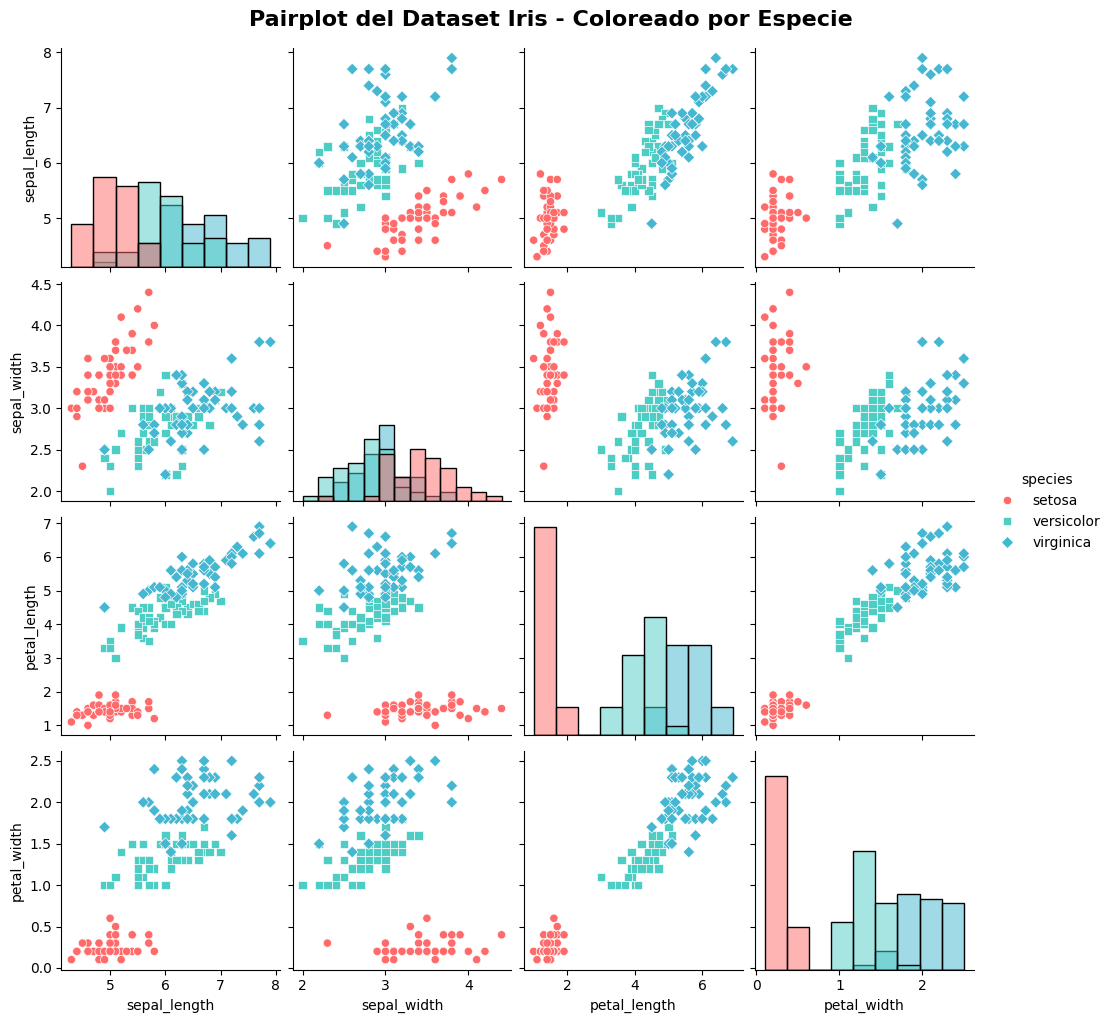

In [ ]:
print("\n🎨 Paso 5: Creando Pairplot coloreado por especie...")

# Crear pairplot
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df, hue='species', palette=['#FF6B6B', '#4ECDC4', '#45B7D1'],
                        diag_kind='hist', markers=['o', 's', 'D'])

# Personalizar el gráfico
pairplot.fig.suptitle('Pairplot del Dataset Iris - Coloreado por Especie',
                      y=1.02, fontsize=16, fontweight='bold')

print("✅ Pairplot creado exitosamente")
plt.show()

## **Paso 6: Análisis de los patrones visuales**
Interpretamos cualitativamente los gráficos para extraer insights sobre cómo se separan las especies y qué relaciones existen entre variables.

In [ ]:
print("\n🔬 Paso 6: Análisis de patrones en el Pairplot...")

print("\n📝 OBSERVACIONES DEL PAIRPLOT:")
print("1. 🌸 SETOSA: Se distingue claramente en todos los gráficos")
print("   - Petalos más pequeños y sépalos más anchos")
print("   - Forma un grupo compacto y bien separado")

print("\n2. 🌺 VERSICOLOR: Posición intermedia en la mayoría de características")
print("   - Tamaño de pétalos y sépalos intermedio")
print("   - Alguna superposición con virginica")

print("\n3. 🌹 VIRGINICA: Valores más grandes en pétalos")
print("   - Pétalos más largos y anchos")
print("   - Mayor variabilidad en algunas características")

print("\n🎯 RELACIONES MÁS FUERTES IDENTIFICADAS:")
print("   - Petal_length vs Petal_width: Correlación muy fuerte")
print("   - Sepal_length vs Petal_length: Buena correlación")
print("   - Sepal_width muestra menor correlación con otras variables")


🔬 Paso 6: Análisis de patrones en el Pairplot...

📝 OBSERVACIONES DEL PAIRPLOT:
1. 🌸 SETOSA: Se distingue claramente en todos los gráficos
   - Petalos más pequeños y sépalos más anchos
   - Forma un grupo compacto y bien separado

2. 🌺 VERSICOLOR: Posición intermedia en la mayoría de características
   - Tamaño de pétalos y sépalos intermedio
   - Alguna superposición con virginica

3. 🌹 VIRGINICA: Valores más grandes en pétalos
   - Pétalos más largos y anchos
   - Mayor variabilidad en algunas características

🎯 RELACIONES MÁS FUERTES IDENTIFICADAS:
   - Petal_length vs Petal_width: Correlación muy fuerte
   - Sepal_length vs Petal_length: Buena correlación
   - Sepal_width muestra menor correlación con otras variables


## **Paso 7: Resumen ejecutivo**
Sintetizamos los hallazgos más importantes en un formato claro y accionable para toma de decisiones.

In [ ]:
print("\n📈 Paso 7: Resumen ejecutivo del análisis")

print("\n" + "="*60)
print("         RESUMEN EJECUTIVO - ANÁLISIS ESTADÍSTICO IRIS")
print("="*60)

# Resumen numérico
print(f"\n📊 RESUMEN NUMÉRICO:")
columnas_numericas = df.select_dtypes(include=[np.number]).columns
for col in columnas_numericas:
    media_total = df[col].mean()
    std_total = df[col].std()
    print(f"   {col:15} | Media: {media_total:6.2f} | Desv. Est.: {std_total:5.2f}")

# Hallazgos principales
print(f"\n🎯 HALLAZGOS PRINCIPALES:")
print("1. Setosa es la especie más distintiva y homogénea")
print("2. Virginica tiene los valores más extremos en pétalos")
print("3. Existe fuerte correlación entre dimensiones de pétalos")
print("4. El pairplot muestra buena separación visual entre especies")

# Utilidad para machine learning
print(f"\n🤖 UTILIDAD PARA MACHINE LEARNING:")
print("   - Buen dataset para clasificación (clases bien separadas)")
print("   - Características numéricas continuas")
print("   - Sin valores nulos (dataset limpio)")
print("   - Balance perfecto (50 observaciones por clase)")

print("\n🎉 ¡Reto 7 completado! Análisis estadístico y visualización finalizados")
print("="*60)


📈 Paso 7: Resumen ejecutivo del análisis

         RESUMEN EJECUTIVO - ANÁLISIS ESTADÍSTICO IRIS

📊 RESUMEN NUMÉRICO:
   sepal_length    | Media:   5.84 | Desv. Est.:  0.83
   sepal_width     | Media:   3.06 | Desv. Est.:  0.44
   petal_length    | Media:   3.76 | Desv. Est.:  1.77
   petal_width     | Media:   1.20 | Desv. Est.:  0.76

🎯 HALLAZGOS PRINCIPALES:
1. Setosa es la especie más distintiva y homogénea
2. Virginica tiene los valores más extremos en pétalos
3. Existe fuerte correlación entre dimensiones de pétalos
4. El pairplot muestra buena separación visual entre especies

🤖 UTILIDAD PARA MACHINE LEARNING:
   - Buen dataset para clasificación (clases bien separadas)
   - Características numéricas continuas
   - Sin valores nulos (dataset limpio)
   - Balance perfecto (50 observaciones por clase)

🎉 ¡Reto 7 completado! Análisis estadístico y visualización finalizados


## **Paso 8: Visualización adicional - Boxplots por especie**
Complementamos el análisis con visualizaciones que muestran la distribución y variabilidad de cada característica por especie.


📦 Paso 8: Visualización adicional - Boxplots por especie


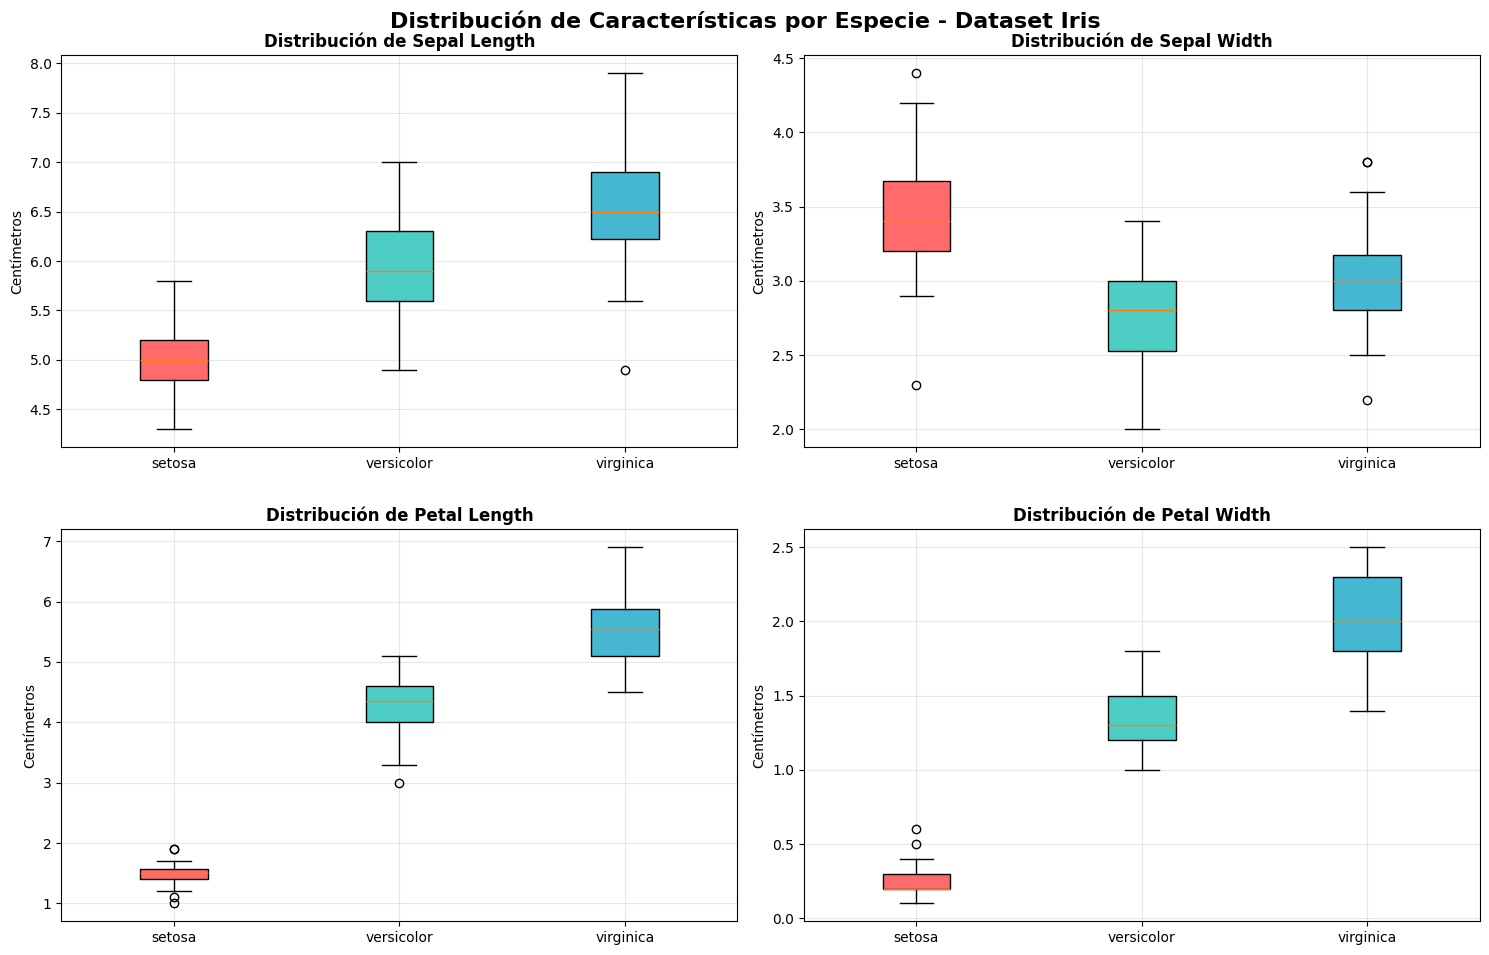

✅ Boxplots adicionales creados exitosamente


In [ ]:
print("\n📦 Paso 8: Visualización adicional - Boxplots por especie")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

caracteristicas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, caracteristica in enumerate(caracteristicas):
    # Crear boxplot para cada característica
    data_por_especie = [df[df['species'] == especie][caracteristica]
                        for especie in df['species'].unique()]

    box = axes[i].boxplot(data_por_especie, labels=df['species'].unique(),
                         patch_artist=True)

    # Colorear los boxplots
    for patch, color in zip(box['boxes'], colores):
        patch.set_facecolor(color)

    axes[i].set_title(f'\nDistribución de {caracteristica.replace("_", " ").title()}',
                     fontweight='bold')
    axes[i].set_ylabel('Centímetros')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Distribución de Características por Especie - Dataset Iris',
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

print("✅ Boxplots adicionales creados exitosamente")

## **🎯 Puntos clave del Reto 7**

1. **Estadísticas descriptivas**: Cálculo de media y desviación estándar para entender la distribución central y variabilidad de los datos.

2. **Análisis por grupo**: Uso de `groupby()` para calcular estadísticas separadas por especie, revelando patrones específicos de cada categoría.

3. **Visualización multivariable**: El pairplot permite visualizar relaciones entre todas las variables simultáneamente, coloreando por especie para identificar patrones de clasificación.

4. **Identificación de patrones**: Análisis cualitativo de los gráficos para extraer insights sobre cómo se relacionan las variables y cómo se separan las especies.

5. **Preparación para ML**: Este análisis es fundamental como paso previo a modelos de machine learning, ya que identifica variables discriminantes y relaciones entre características.

**📚 Valor educativo**: Este reto enseña el flujo completo de análisis exploratorio - desde estadísticas básicas hasta visualización avanzada, mostrando cómo diferentes técnicas revelan diferentes aspectos de los datos.